In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/preprocessed_combined_dataset.csv')

# Check the data structure
print(data.head())
print(data.info())

# Select features and target
features = data[['price_x', 'discount_amount', 'category_encoded', 'Region_encoded_x']]
target = data['qty_ordered']

# Handle missing values
features.fillna(features.median(), inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


C:\Users\linke\AppData\Local\Temp\ipykernel_12772\4283079801.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/preprocessed_combined_dataset.csv')


    order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  2020-01-10  received   574772   oasis_Oasis-064-36          4.5   
1  100354678  2020-01-10  received   574774      Fantastic_FT-48          4.5   
2  100354680  2020-01-10  complete   574777      mdeal_DMC-610-8          4.5   
3  100354680  2020-01-10  complete   574779   oasis_Oasis-061-36          4.5   
4  100367357         NaN  received   595185  MEFNAR59C38B6CA08CD          2.0   

   price_x   value  discount_amount   total  ... productURL stars reviews  \
0     89.9  1798.0              0.0  1798.0  ...        NaN   NaN     NaN   
1     19.0   190.0              0.0   190.0  ...        NaN   NaN     NaN   
2    149.9  1199.2              0.0  1199.2  ...        NaN   NaN     NaN   
3     79.9   639.2              0.0   639.2  ...        NaN   NaN     NaN   
4     99.9    99.9              0.0    99.9  ...        NaN   NaN     NaN   

   price_y  listPrice category_id  isBestSeller bo

C:\Users\linke\AppData\Local\Temp\ipykernel_12772\4283079801.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.median(), inplace=True)


In [29]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = rf_model.predict(X_test)  # Ensure this step is completed


In [30]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display metrics
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print Adjusted R²
print(f"Adjusted R²: {adjusted_r2:.2f}")



R² Score: 0.54
RMSE: 0.63
MAE: 0.35
MAPE: 15.53%
Adjusted R²: 0.54


C:\Users\linke\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


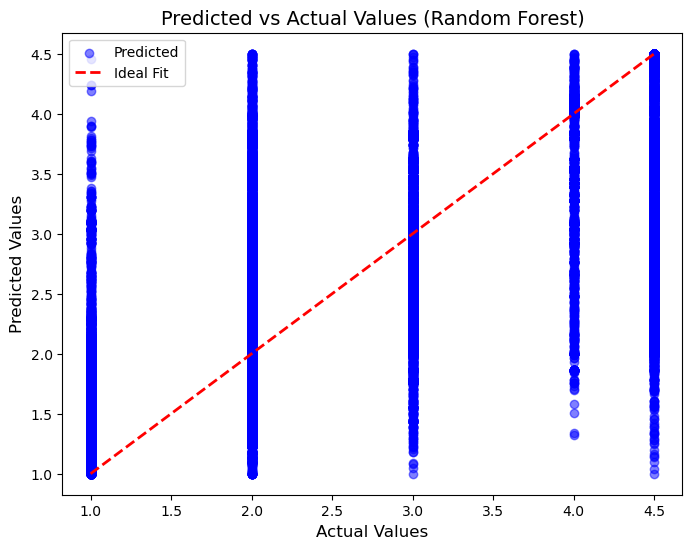

In [31]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Predicted vs Actual Values (Random Forest)', fontsize=14)
plt.legend(fontsize=10)
plt.show()


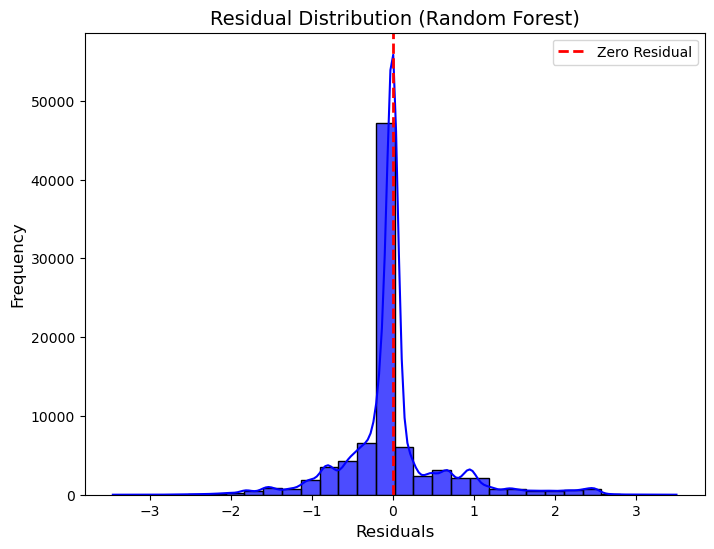

In [35]:
# Residual Distribution Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residual Distribution (Random Forest)', fontsize=14)
plt.legend(fontsize=10)
plt.show()


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

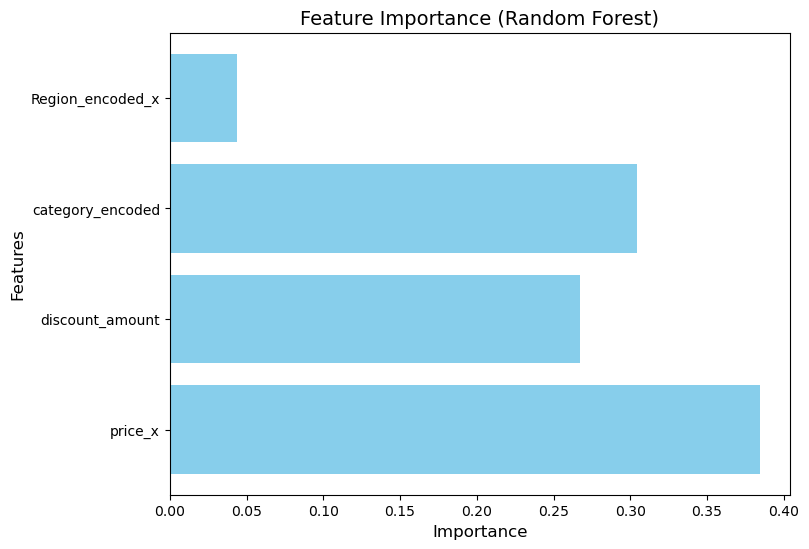

In [39]:
# Feature Importance Plot
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.show()


In [43]:
print(features.columns)


Index(['price_x', 'discount_amount', 'category_encoded', 'Region_encoded_x'], dtype='object')


In [45]:
print(data.columns)


Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price_x', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City_x', 'State_x', 'Zip', 'Region_x',
       'User Name', 'Discount_Percent', 'status_encoded', 'category_encoded',
       'payment_method_encoded', 'Region_encoded_x', 'Order ID', 'Order Date',
       'Customer Name', 'City_y', 'Country', 'Region_y', 'Segment',
       'Ship Date', 'Ship Mode', 'State_y', 'Customer Name_encoded',
       'City_encoded', 'Country_encoded', 'Region_encoded_y',
       'Segment_encoded', 'Ship Mode_encoded', 'asin', 'title', 'imgUrl',
       'productURL', 'stars', 'reviews', 'price_y', 'listPrice', 'category_id',
       'isBestSeller', 'boughtInLastMonth', 'id', 'category

In [47]:
y = data['qty_ordered']  # Ensure the correct column name


In [54]:
print(data['qty_ordered'].dtype)


float64


In [51]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Use R² as the scoring metric

# Display scores
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())
print("Standard Deviation of R² Scores:", cv_scores.std())


Cross-Validation R² Scores: [0.53498113 0.5653926  0.50746932 0.25500635 0.43667966]
Mean R² Score: 0.4599058119431322
Standard Deviation of R² Scores: 0.1109498056700066
